# Temat1 przygotowanie_danych


# Wstęp 
Wstępna analiza ma na podstawie dostarczonych danych ma pan pozwolić zrozumieć dane, w celu pozniejszego

Przykładowe kroki:
- Krótki opis danych wejściowych.
- Transformacja surowych danych(uzupełnianie braków, usunięcie kolumn ze zbyt dużą liczbą braków lub nie wnoszących nic do analizy).
- stworzenie nowych zmiennych na podstawie już "doprowadzonych do ładu", często dopiero nowe zmienne posiadają wartość predykcyjną.
- Wykonanie eksploracji i wizualizacji danych, ten krok pozwoli nam odpowiedzięc na wiele pytań, oraz może pokazać informacje, ktore się widocznie na pierwszy rzut oka.
- Selekcja kolumn w celu ich póżniejszego modelowania.

## Zbiór IRIS

### Pobranie i prezentacja tekstowa zbioru IRIS

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns


data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=['sepal_length','sepal_width','petal_length','petal_width','target'])
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Podstawowa statystyka dotycząca danych

In [2]:
data['class'].value_counts()  # podsumowanie wystąpień klas


Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: class, dtype: int64

In [3]:
data.describe(include='all')  # podsumowanie statystyk w formie czytelnej tabeli

,sepal length,sepal width,petal length,petal width,class
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


### macierz kowariancji i korelacji

In [4]:
print('Macierz kowariancji:')
data.cov()

Macierz kowariancji:


,sepal length,sepal width,petal length,petal width
sepal length,0.685694,-0.039268,1.273682,0.516904
sepal width,-0.039268,0.188004,-0.321713,-0.117981
petal length,1.273682,-0.321713,3.113179,1.296387
petal width,0.516904,-0.117981,1.296387,0.582414


In [5]:
print('Macierz korelacji:')
data.corr()

Macierz korelacji:


,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


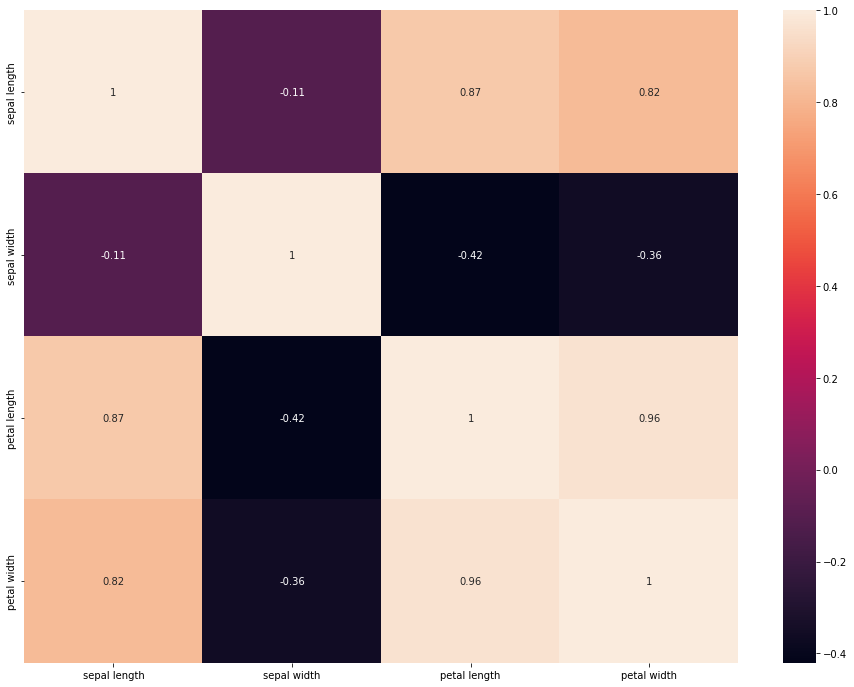

In [6]:
plt.figure(figsize=(16,12))
sns.heatmap(data.corr(), annot = True)

### Wizualizacja danych

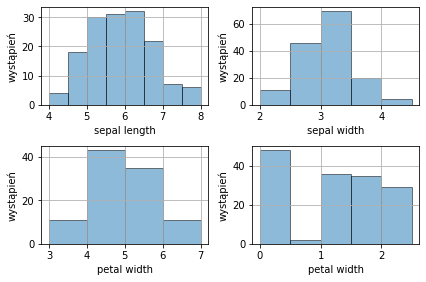

In [7]:
#histogramy

import numpy as np
import matplotlib.pyplot as plt



ax = plt.subplot(2,2,1)
bins = np.linspace(4, 8, 9)
plt.hist(data['sepal length'], bins=bins, align="mid", alpha=0.5, histtype='bar', ec='black')
plt.ylabel('wystąpień')
plt.xlabel('sepal length')
plt.grid(True)


ax = plt.subplot(2,2,2)
bins = np.linspace(2, 4.5, 6)
plt.hist(data['sepal width'], bins=bins, align="mid", alpha=0.5, histtype='bar', ec='black')
plt.xlabel('sepal width')
plt.ylabel('wystąpień')
plt.grid(True)

ax = plt.subplot(2,2,3)
bins = np.linspace(3, 7, 5)
plt.hist(data['petal length'], bins=bins, align="mid", alpha=0.5, histtype='bar', ec='black')
plt.xlabel('petal width')
plt.ylabel('wystąpień')
plt.grid(True)

ax = plt.subplot(2,2,4)
bins = np.linspace(0, 2.5, 6)
plt.hist(data['petal width'], bins=bins, align="mid", alpha=0.5, histtype='bar', ec='black')
plt.xlabel('petal width')
plt.ylabel('wystąpień')
plt.grid(True)

plt.tight_layout(pad=1.0)





In [8]:
#jak histogramy, to i musza byc wykresy slupkowe

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: class, dtype: int64

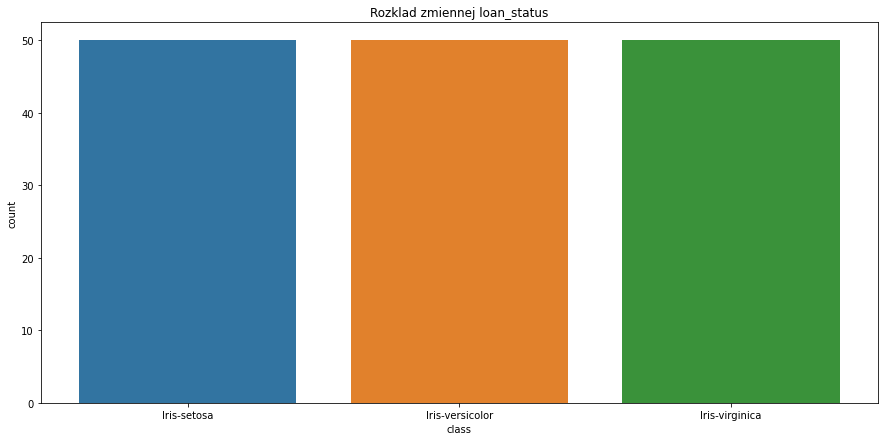

In [9]:
col = 'class'

plt.figure(figsize=[15,7])
plt.xlabel("0 - nie spłaci, 1 - spłaci")
plt.ylabel("liczba wystąpień danej klasy")
plt.title("Rozklad zmiennej loan_status")
sns.countplot(x=col, data=data)
plt.plot()
data['class'].value_counts()  # podsumowanie wystąpień klas


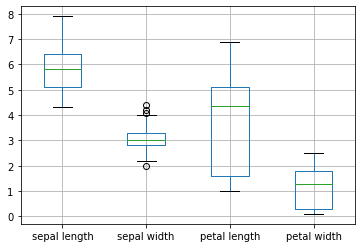

In [10]:
%matplotlib inline
data.boxplot()

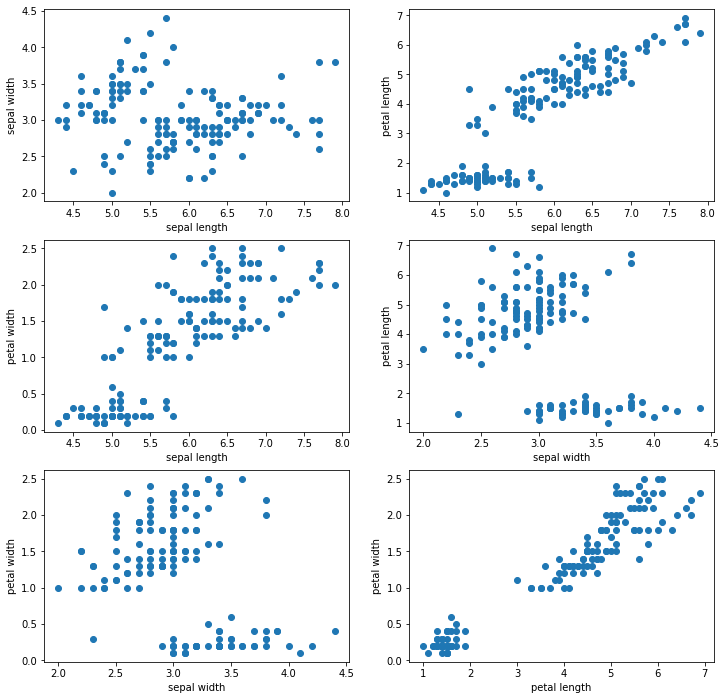

In [11]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(12,12))
index = 0
for i in range(3):
    for j in range(i+1,4):
        ax1 = int(index/2)
        ax2 = index % 2
        axes[ax1][ax2].scatter(data[data.columns[i]], data[data.columns[j]])
        axes[ax1][ax2].set_xlabel(data.columns[i])
        axes[ax1][ax2].set_ylabel(data.columns[j])
        index = index + 1

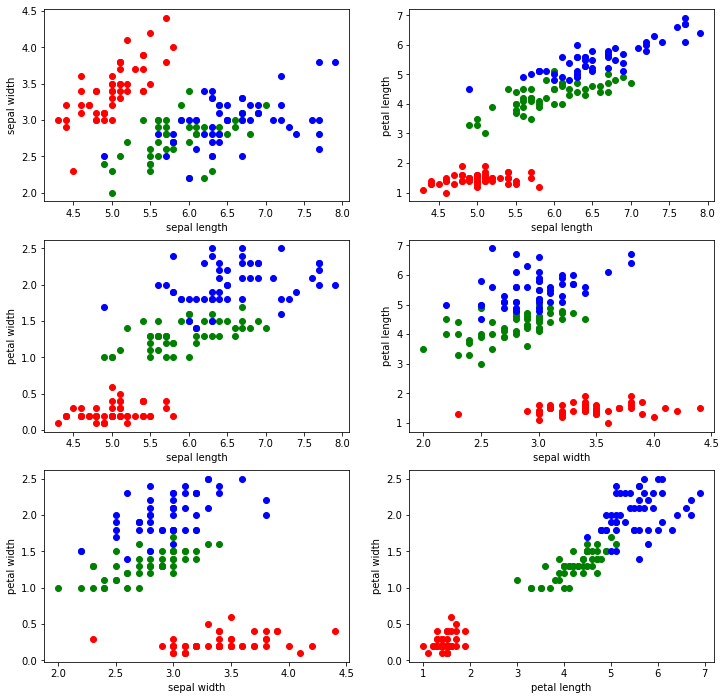

In [12]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(12,12))
index = 0
for i in range(3):
    for j in range(i+1,4):
        ax1 = int(index/2)
        ax2 = index % 2
        axes[ax1][ax2].scatter(data[data.columns[i]][:50], data[data.columns[j]][:50], color="red", )
        axes[ax1][ax2].scatter(data[data.columns[i]][50:100], data[data.columns[j]][50:100], color="green")
        axes[ax1][ax2].scatter(data[data.columns[i]][100:150], data[data.columns[j]][100:150], color="blue")
        axes[ax1][ax2].set_xlabel(data.columns[i])
        axes[ax1][ax2].set_ylabel(data.columns[j])
        index = index + 1

## Zbiór breast cancer

### Pobranie danych i podstawowa charakterystyka

In [13]:
import pandas as pd
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']

data = data.drop(['Sample code'], axis=1)
print('Liczba elementów zbioru = %d' % (data.shape[0]))
print('Liczba atrybutów (cech) = %d' % (data.shape[1]))
data.head()

Liczba elementów zbioru = 699
Liczba atrybutów (cech) = 10


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [14]:
data = data.replace('?',np.NaN)

In [15]:
#liczba kolumn
len(data.columns)

10

In [16]:
#liczba brakow w columns
temp=data.isnull().sum()
temp = pd.DataFrame(temp)
mapping = {temp.columns[0]:'Count'}
temp = temp.rename(columns=mapping)
temp.style.set_properties(subset=['Count'], **{'width': '1000px'})

,Count
Clump Thickness,0
Uniformity of Cell Size,0
Uniformity of Cell Shape,0
Marginal Adhesion,0
Single Epithelial Cell Size,0
Bare Nuclei,16
Bland Chromatin,0
Normal Nucleoli,0
Mitoses,0
Class,0


In [17]:
# w rozkladzie procentowym
temp["procent_brakow"]=(temp["Count"]/len(data))*100
temp['procent_brakow'].to_frame().style.set_properties(subset=['procent_brakow'], **{'width': '1000px'})


,procent_brakow
Clump Thickness,0.000000
Uniformity of Cell Size,0.000000
Uniformity of Cell Shape,0.000000
Marginal Adhesion,0.000000
Single Epithelial Cell Size,0.000000
Bare Nuclei,2.288984
Bland Chromatin,0.000000
Normal Nucleoli,0.000000
Mitoses,0.000000
Class,0.000000


# Uzupełnianie braków
Uzupełnianie braków w kolumnach wg określonej strategii:
- mean - uzupełnianie braków za pomocą średniej, stosuje się tylko dla danych ilościowych
- mode - uzupełnianie braków za pomocą mody, raczej dla wartości dyskretnych, można stosować dla danych kategorycznych
- 0 - uzupełnianie braków za pomocą 0, stosuje się w przypadku, gdzie wartość 0 ma jasną interpretację.
- specific value - uzywamy w przypadku gdy chcemy użyć jakieś customowej wartości, np 33 lub dwa, ważne żeby wartość była tego samego typu co uzupełniania kolumna.
- next_row, previous_row
  

In [18]:
# df.fillna(method="backfill", inplace=True) # previous row
# df.fillna(method="ffill", inplace=True) #next row
# df.fillna(0, inplace=True) #fill by 0
# df.fillna(spefic_value, inplace=True) specific_value
# df.fillna(df.mean(), inplace=True) mean
# df.fillna(df.mode(dropna=True), inplace=True)
# df.interpolate()


W naszym datasecie nie ma brakow danych, wiec stworzmy na szybko spreparowany dataset, by pokazac mozliwosci uzupelniania brakow

In [19]:
ratings = [['Jan',5,np.NaN,2,1],['Maria',np.NaN,5,3,2],['Robert',4,4,np.NaN,3],['Ela',2,np.NaN,np.NaN,5],['Stanisław',1,2,3,4],['Adam',2,1,5,np.NaN]]
titles = ['kinoman','Szczęki','Star Wars','Egzorcysta','Omen']
movies = pd.DataFrame(ratings,columns=titles)
movies

,kinoman,Szczęki,Star Wars,Egzorcysta,Omen
0,Jan,5.0,NaN,2.0,1.0
1,Maria,NaN,5.0,3.0,2.0
2,Robert,4.0,4.0,NaN,3.0
3,Ela,2.0,NaN,NaN,5.0
4,Stanisław,1.0,2.0,3.0,4.0
5,Adam,2.0,1.0,5.0,NaN


In [20]:
movies.fillna(method="backfill")


,kinoman,Szczęki,Star Wars,Egzorcysta,Omen
0,Jan,5.0,5.0,2.0,1.0
1,Maria,4.0,5.0,3.0,2.0
2,Robert,4.0,4.0,3.0,3.0
3,Ela,2.0,2.0,3.0,5.0
4,Stanisław,1.0,2.0,3.0,4.0
5,Adam,2.0,1.0,5.0,NaN


In [21]:
movies.fillna(method="ffill")


,kinoman,Szczęki,Star Wars,Egzorcysta,Omen
0,Jan,5.0,NaN,2.0,1.0
1,Maria,5.0,5.0,3.0,2.0
2,Robert,4.0,4.0,3.0,3.0
3,Ela,2.0,4.0,3.0,5.0
4,Stanisław,1.0,2.0,3.0,4.0
5,Adam,2.0,1.0,5.0,4.0


In [22]:
movies.fillna(0) 

,kinoman,Szczęki,Star Wars,Egzorcysta,Omen
0,Jan,5.0,0.0,2.0,1.0
1,Maria,0.0,5.0,3.0,2.0
2,Robert,4.0,4.0,0.0,3.0
3,Ela,2.0,0.0,0.0,5.0
4,Stanisław,1.0,2.0,3.0,4.0
5,Adam,2.0,1.0,5.0,0.0


In [23]:
movies.fillna(-1) 

,kinoman,Szczęki,Star Wars,Egzorcysta,Omen
0,Jan,5.0,-1.0,2.0,1.0
1,Maria,-1.0,5.0,3.0,2.0
2,Robert,4.0,4.0,-1.0,3.0
3,Ela,2.0,-1.0,-1.0,5.0
4,Stanisław,1.0,2.0,3.0,4.0
5,Adam,2.0,1.0,5.0,-1.0


In [24]:
movies.fillna(movies.mean()) #mean

,kinoman,Szczęki,Star Wars,Egzorcysta,Omen
0,Jan,5.0,3.0,2.00,1.0
1,Maria,2.8,5.0,3.00,2.0
2,Robert,4.0,4.0,3.25,3.0
3,Ela,2.0,3.0,3.25,5.0
4,Stanisław,1.0,2.0,3.00,4.0
5,Adam,2.0,1.0,5.00,3.0


In [25]:
movies

,kinoman,Szczęki,Star Wars,Egzorcysta,Omen
0,Jan,5.0,NaN,2.0,1.0
1,Maria,NaN,5.0,3.0,2.0
2,Robert,4.0,4.0,NaN,3.0
3,Ela,2.0,NaN,NaN,5.0
4,Stanisław,1.0,2.0,3.0,4.0
5,Adam,2.0,1.0,5.0,NaN


In [26]:
movies.interpolate()

,kinoman,Szczęki,Star Wars,Egzorcysta,Omen
0,Jan,5.0,NaN,2.0,1.0
1,Maria,4.5,5.0,3.0,2.0
2,Robert,4.0,4.0,3.0,3.0
3,Ela,2.0,3.0,3.0,5.0
4,Stanisław,1.0,2.0,3.0,4.0
5,Adam,2.0,1.0,5.0,4.0


In [27]:
fill_mode = lambda col: col.fillna(col.mode().iloc[0])
movies.apply(fill_mode, axis=0)

,kinoman,Szczęki,Star Wars,Egzorcysta,Omen
0,Jan,5.0,1.0,2.0,1.0
1,Maria,2.0,5.0,3.0,2.0
2,Robert,4.0,4.0,3.0,3.0
3,Ela,2.0,1.0,3.0,5.0
4,Stanisław,1.0,2.0,3.0,4.0
5,Adam,2.0,1.0,5.0,1.0


In [28]:
#one column
num = movies["Egzorcysta"].mode().iloc[0]

movies["Egzorcysta"].fillna(num)

0    2.0
1    3.0
2    3.0
3    3.0
4    3.0
5    5.0
Name: Egzorcysta, dtype: float64

# Usuwanie kolumn

In [29]:
ratings = [['Jan',5,np.NaN,2,1],['Maria',np.NaN,5,3,2],['Robert',4,4,np.NaN,3],['Ela',2,np.NaN,np.NaN,np.NaN],['Stanisław',1,2,np.NaN,4],['Adam',2,1,5,np.NaN]]
titles = ['kinoman','Szczęki','Star Wars','Egzorcysta','Omen']
movies2 = pd.DataFrame(ratings,columns=titles)
movies2

,kinoman,Szczęki,Star Wars,Egzorcysta,Omen
0,Jan,5.0,NaN,2.0,1.0
1,Maria,NaN,5.0,3.0,2.0
2,Robert,4.0,4.0,NaN,3.0
3,Ela,2.0,NaN,NaN,NaN
4,Stanisław,1.0,2.0,NaN,4.0
5,Adam,2.0,1.0,5.0,NaN


In [30]:
movies2.dropna(how='any',axis=1,thresh=5) #conajmniej 5 elementow nie pustych


,kinoman,Szczęki
0,Jan,5.0
1,Maria,NaN
2,Robert,4.0
3,Ela,2.0
4,Stanisław,1.0
5,Adam,2.0


In [31]:
ratings = [['Jan',5,5,5,5],['Maria',5,5,3,2],['Robert',5,4,np.NaN,3],['Ela',5,np.NaN,np.NaN,np.NaN],['Stanisław',5,2,np.NaN,4],['Adam',5,1,5,np.NaN]]
titles = ['kinoman','Szczęki','Star Wars','Egzorcysta','Omen']
movies3 = pd.DataFrame(ratings,columns=titles)
movies3





,kinoman,Szczęki,Star Wars,Egzorcysta,Omen
0,Jan,5,5.0,5.0,5.0
1,Maria,5,5.0,3.0,2.0
2,Robert,5,4.0,NaN,3.0
3,Ela,5,NaN,NaN,NaN
4,Stanisław,5,2.0,NaN,4.0
5,Adam,5,1.0,5.0,NaN


In [32]:
movies3.loc[:, movies3.apply(pd.Series.nunique) != 1] #usuniecie kolumn z ta sama wartoscia

,kinoman,Star Wars,Egzorcysta,Omen
0,Jan,5.0,5.0,5.0
1,Maria,5.0,3.0,2.0
2,Robert,4.0,NaN,3.0
3,Ela,NaN,NaN,NaN
4,Stanisław,2.0,NaN,4.0
5,Adam,1.0,5.0,NaN


Zad1

In [33]:
#uzyj zmiennej movies2, pokaz jaki procent w kazdej kolumnie stanowia braki
#uzupelnij braki wartoscia maksymalna z odpowiedniej kolumny


# Selekcja kolumn tekstowych

In [34]:
data.select_dtypes(include='object')

,Bare Nuclei
0,1
1,10
2,2
3,4
4,1
...,...
694,2
695,1
696,3
697,4


# Selekcja kolumn liczbowych

In [35]:
data.select_dtypes(exclude='object')

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,3,1,1,2
1,5,4,4,5,7,3,2,1,2
2,3,1,1,1,2,3,1,1,2
3,6,8,8,1,3,3,7,1,2
4,4,1,1,3,2,3,1,1,2
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,1,1,1,2
695,2,1,1,1,2,1,1,1,2
696,5,10,10,3,7,8,10,2,4
697,4,8,6,4,3,10,6,1,4


# Wybieranie kolumn wg konkretnego typu zmiennej

In [36]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_columns = data.select_dtypes(include=numerics)

# Zmiana typu zmiennej

In [37]:
data['Bare Nuclei'] = data['Bare Nuclei'].astype(float)

In [38]:
data['Bare Nuclei'].dtype

dtype('float64')

# Standaryzacja

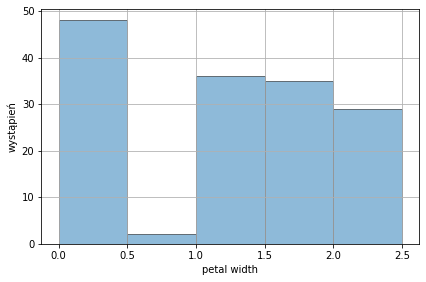

In [39]:
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=['sepal_length','sepal_width','petal_length','petal_width','target'])
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
ax = plt.subplot(1,1,1)
bins = np.linspace(0, 2.5, 6)
plt.hist(data['petal width'], bins=bins, align="mid", alpha=0.5, histtype='bar', ec='black')
plt.xlabel('petal width')
plt.ylabel('wystąpień')
plt.grid(True)

plt.tight_layout(pad=1.0)

In [40]:
def standarization(df):
    standarized = df.apply(lambda x: (x - x.mean()) /max(x))
    return standarized

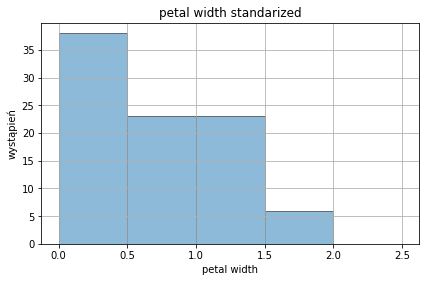

In [41]:
temp = data['petal width']
temp_std = (data['petal width']-data['petal width'].mean())/data['petal width'].std()
ax = plt.subplot(1,1,1)
bins = np.linspace(0, 2.5, 6)
plt.hist(temp_std, bins=bins, align="mid", alpha=0.5, histtype='bar', ec='black')
plt.title("petal width standarized")
plt.xlabel('petal width')
plt.ylabel('wystąpień')
plt.grid(True)

plt.tight_layout(pad=1.0)

In [44]:
#zad2 - wykonaj normalizacje(przez co rozumiem podzielenie kolumny przez jej wartosc maksymalna z kolumny)
#uzyj do tego kolumny data["Clump Thickness"] ze zbiory cancer
#ustaw 3 wykresy(subploty) obok siebie - oryginalny Clump, znormalizowany, standaryzowane.
#Czy i gdzie widac roznice miedzy danymi wykresami?

